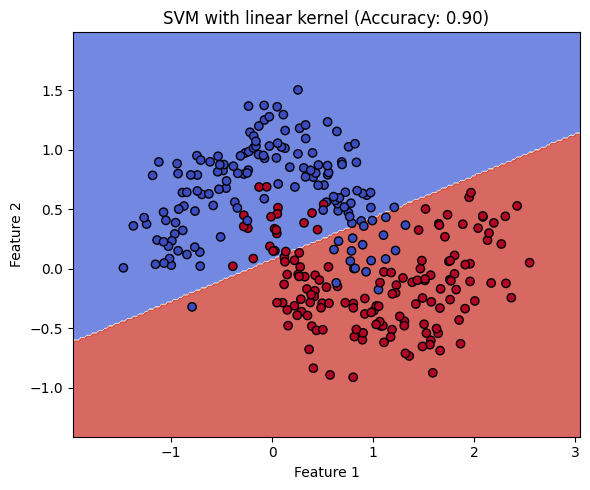

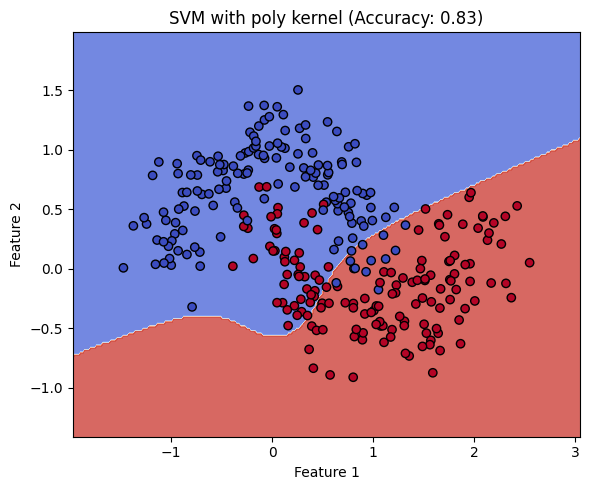

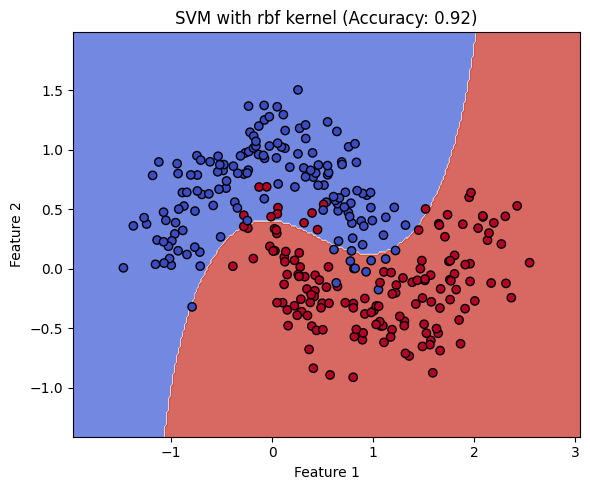

{'linear': {'accuracy': 0.9,
  'report': {'0': {'precision': 0.8918918918918919,
    'recall': 0.868421052631579,
    'f1-score': 0.88,
    'support': 38.0},
   '1': {'precision': 0.9056603773584906,
    'recall': 0.9230769230769231,
    'f1-score': 0.9142857142857143,
    'support': 52.0},
   'accuracy': 0.9,
   'macro avg': {'precision': 0.8987761346251912,
    'recall': 0.895748987854251,
    'f1-score': 0.8971428571428571,
    'support': 90.0},
   'weighted avg': {'precision': 0.899847016828149,
    'recall': 0.9,
    'f1-score': 0.8998095238095238,
    'support': 90.0}}},
 'poly': {'accuracy': 0.8333333333333334,
  'report': {'0': {'precision': 0.7446808510638298,
    'recall': 0.9210526315789473,
    'f1-score': 0.8235294117647058,
    'support': 38.0},
   '1': {'precision': 0.9302325581395349,
    'recall': 0.7692307692307693,
    'f1-score': 0.8421052631578947,
    'support': 52.0},
   'accuracy': 0.8333333333333334,
   'macro avg': {'precision': 0.8374567046016823,
    'recall

In [3]:
# Full SVM Kernel Comparison Code with Additional Features:
# - Hyperparameter tuning (manual variation of C and gamma)
# - Classification report
# - Plot saving (for PDF/tutorial use)
# - Expanded comments for educational use

from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import os

# Create a directory to save plots
os.makedirs("svm_plots", exist_ok=True)

# Function to plot decision boundaries and save the plot
def plot_decision_boundary(X, y, model, title, filename):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.savefig(f"svm_plots/{filename}")
    plt.show()

# Generate non-linear synthetic data
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Kernels to evaluate
kernels = ['linear', 'poly', 'rbf']
models = {}
results = {}

# Train and evaluate each kernel
for kernel in kernels:
    if kernel == 'poly':
        clf = SVC(kernel='poly', degree=3, gamma='auto', C=1.0)
    else:
        clf = SVC(kernel=kernel, gamma='auto', C=1.0)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    models[kernel] = clf
    results[kernel] = {
        "accuracy": acc,
        "report": report
    }

    title = f"SVM with {kernel} kernel (Accuracy: {acc:.2f})"
    filename = f"{kernel}_kernel_decision_boundary.png"
    plot_decision_boundary(X, y, clf, title, filename)

results


In [4]:
from sklearn.metrics import classification_report

# Print classification reports for all three kernels
for kernel in kernels:
    print(f"\n--- Classification Report for {kernel.upper()} Kernel ---")
    report_dict = results[kernel]["report"]
    print(classification_report(y_test, models[kernel].predict(X_test)))



--- Classification Report for LINEAR Kernel ---
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.91      0.92      0.91        52

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90


--- Classification Report for POLY Kernel ---
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        38
           1       0.93      0.77      0.84        52

    accuracy                           0.83        90
   macro avg       0.84      0.85      0.83        90
weighted avg       0.85      0.83      0.83        90


--- Classification Report for RBF Kernel ---
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.94      0.92      0.93        52

    accuracy                           0